In [3]:
import yfinance as yf

In [4]:
japan_stock_index_monthly = yf.download("^N225", start="2012-01-01", end="2025-09-1" ,interval="1mo")['Close']

C:\Users\dell\AppData\Local\Temp\ipykernel_15580\821867498.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  japan_stock_index_monthly = yf.download("^N225", start="2012-01-01", end="2025-09-1" ,interval="1mo")['Close']
[*********************100%***********************]  1 of 1 completed


In [5]:
japan_stock_index_monthly.head()

Ticker,^N225
Date,
2012-01-01,8802.509766
2012-02-01,9723.240234
2012-03-01,10083.559570
2012-04-01,9520.889648
2012-05-01,8542.730469


In [6]:
japan_stock_index_monthly.to_excel("japan_stock_index_monthly.xlsx")

In [7]:
import pandas as pd

In [8]:
japan_data = pd.read_excel('japan_data.xlsx')

In [9]:
japan_data.tail(13)

,Year,IIP(base 2020),cop (Yen/kl ),cop (yen/bbl),M3 (100 million yen),M3 (yen),CPI,IR %,log(iip),log(COP),log(M3),^N225 (yen),log(TSE)
163,2012-01-25,114.2,55120.0,8763.38077,11132822.0,1.113282e+15,94.7,0.21164,4.737951,9.078337,34.646089,8802.509766,9.082792
164,2011-12-25,NaN,NaN,NaN,NaN,NaN,94.4,NaN,NaN,NaN,NaN,NaN,NaN
165,2011-11-25,NaN,NaN,NaN,NaN,NaN,94.4,NaN,NaN,NaN,NaN,NaN,NaN
166,2011-10-25,NaN,NaN,NaN,NaN,NaN,94.6,NaN,NaN,NaN,NaN,NaN,NaN
167,2011-09-25,NaN,NaN,NaN,NaN,NaN,94.6,NaN,NaN,NaN,NaN,NaN,NaN
168,2011-08-25,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,NaN,NaN,NaN,NaN
169,2011-07-25,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,NaN,NaN,NaN,NaN
170,2011-06-25,NaN,NaN,NaN,NaN,NaN,94.6,NaN,NaN,NaN,NaN,NaN,NaN
171,2011-05-25,NaN,NaN,NaN,NaN,NaN,94.5,NaN,NaN,NaN,NaN,NaN,NaN
172,2011-04-25,NaN,NaN,NaN,NaN,NaN,94.5,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
new_japan_data = japan_data.iloc[0:132,[0,7,8,9,10,12]]
test = japan_data.iloc[1:10,[0,7,8,9,10,12]]

In [118]:
new_japan_data = new_japan_data[
    ["Year", "log(TSE)", "IR %", "log(M3)", "log(iip)", "log(COP)"]
]



In [12]:
new_japan_data

,Year,log(TSE),IR %,log(M3),log(iip),log(COP)
0,2025-08-25,10.662387,2.749771,35.021255,4.498698,9.272950
1,2025-07-25,10.623029,3.130755,35.020625,4.676560,9.249133
2,2025-06-25,10.608746,3.228782,35.018458,4.641502,9.223040
3,2025-05-25,10.544423,3.518519,35.017604,4.553877,9.292002
4,2025-04-25,10.492534,3.531599,35.017553,4.615121,9.366464
...,...,...,...,...,...,...
127,2015-01-25,9.779872,2.403344,34.729792,4.733563,8.929870
128,2014-12-25,9.767139,2.403344,34.728182,4.704110,9.142762
129,2014-11-25,9.767659,2.405858,34.720553,4.709530,9.221186
130,2014-10-25,9.705875,2.833158,34.715031,4.709530,9.296957


In [13]:
import matplotlib.pyplot as plt 

In [14]:
TSE_data = japan_data.iloc[0:130,[0,11]]

In [15]:
TSE_data.head()

,Year,^N225 (yen)
0,2025-08-25,42718.468750
1,2025-07-25,41069.820312
2,2025-06-25,40487.390625
3,2025-05-25,37965.101562
4,2025-04-25,36045.378906


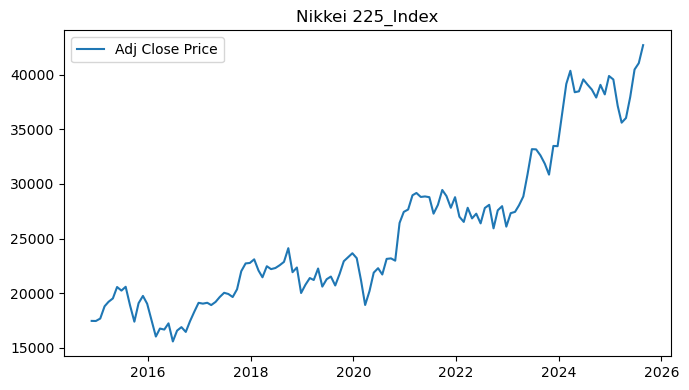

In [16]:
plt.figure(figsize=(7,4))
plt.plot(TSE_data['Year'],TSE_data['^N225 (yen)'], label='Adj Close Price')
plt.title('Nikkei 225_Index')
plt.legend()
plt.tight_layout()

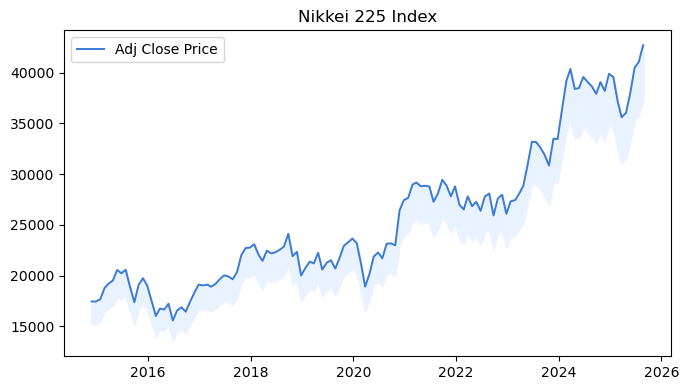

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = TSE_data['Year']
y = TSE_data['^N225 (yen)']

plt.figure(figsize=(7,4))

# Soft blue line
plt.plot(x, y, color='#3a7bd5', linewidth=1.4, label='Adj Close Price')

# Ultra-light faint gradient under the line
for i in range(1, 120):   # More layers → smoother + lighter
    plt.fill_between(
        x,
        y - (y * i/900),
        y,
        color='#e9f3ff',   # extremely light blue (almost white)
        alpha=0.010        # very faint transparency
    )

plt.title('Nikkei 225 Index', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


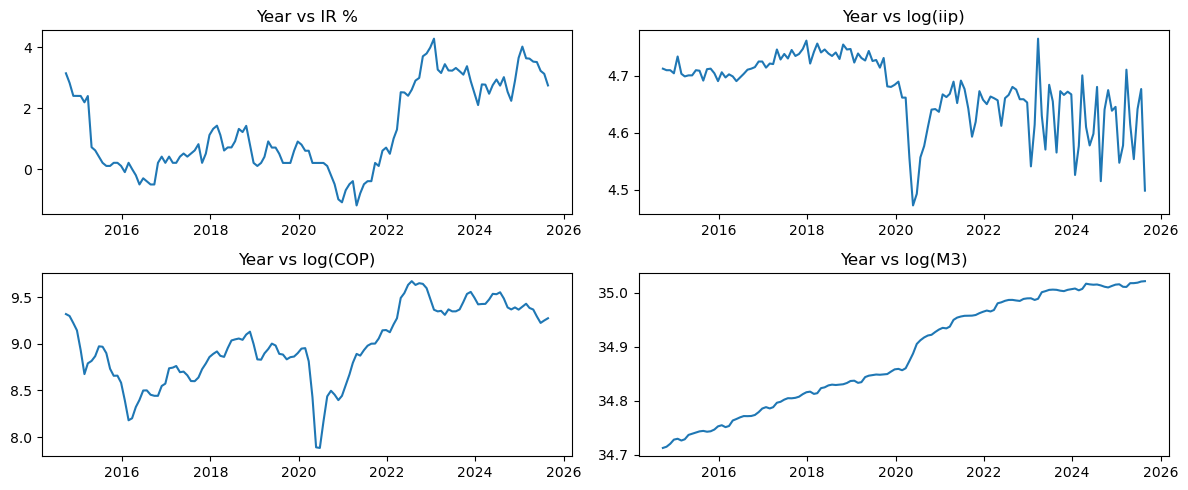

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0,0].plot(new_japan_data['Year'],new_japan_data['IR %'])
ax[0, 0].set_title('Year vs IR %')

ax[0,1].plot(new_japan_data['Year'],new_japan_data['log(iip)'])
ax[0, 1].set_title('Year vs log(iip)')

ax[1,0].plot(new_japan_data['Year'],new_japan_data['log(COP)'])
ax[1, 0].set_title('Year vs log(COP)')

ax[1,1].plot(new_japan_data['Year'],new_japan_data['log(M3)'])
ax[1,1].set_title('Year vs log(M3)')

plt.tight_layout()

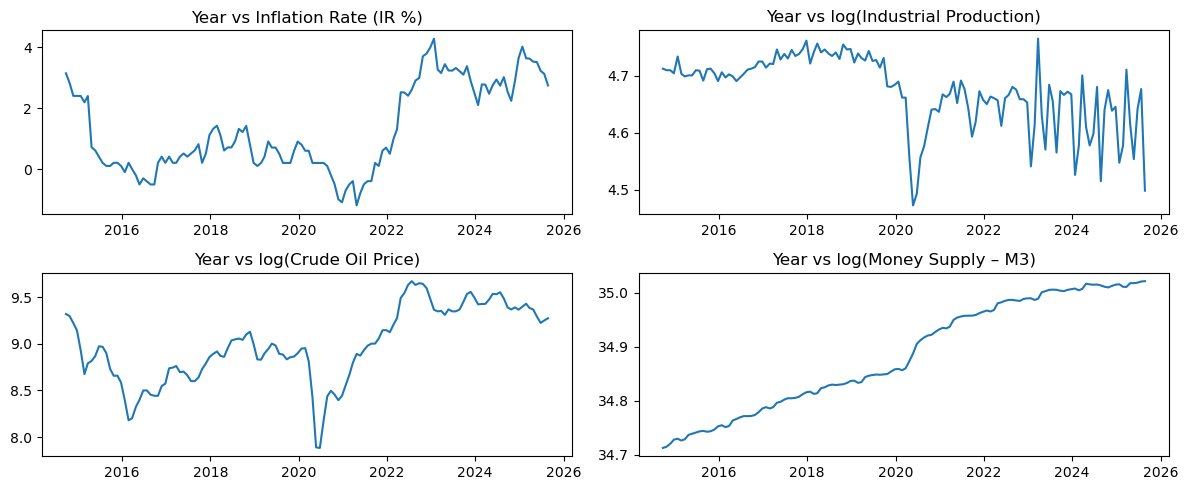

In [19]:
# Plotting historical trends of macroeconomic variables for Japan
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

# Inflation Rate (IR %)
ax[0, 0].plot(new_japan_data['Year'], new_japan_data['IR %'])
ax[0, 0].set_title('Year vs Inflation Rate (IR %)')

# Industrial Production (log-transformed)
ax[0, 1].plot(new_japan_data['Year'], new_japan_data['log(iip)'])
ax[0, 1].set_title('Year vs log(Industrial Production)')

# Crude Oil Price (log-transformed)
ax[1, 0].plot(new_japan_data['Year'], new_japan_data['log(COP)'])
ax[1, 0].set_title('Year vs log(Crude Oil Price)')

# Money Supply M3 (log-transformed)
ax[1, 1].plot(new_japan_data['Year'], new_japan_data['log(M3)'])
ax[1, 1].set_title('Year vs log(Money Supply – M3)')

plt.tight_layout()

# 1.Unit Root Test 

In [20]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

#### TSE(Tokyo Stock Exchange)

In [21]:
# 'c' represents “Intercept” 
print('"intecept is present"')
tse_c = adfuller(new_japan_data['log(TSE)'],regression='c',autolag='AIC')
print('Test Statistic',round(tse_c[0],3))
print('p-value',round(tse_c[1],3))
print('Critical Values')
for key, value in tse_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# 'ct' represents “Trend and Intercept”
print('"Trend and Intercept both are present"')
tse_ct = adfuller(new_japan_data['log(TSE)'],regression='ct',autolag='AIC')
print('Test Statistic',round(tse_ct[0],3))
print('p-value',round(tse_ct[1],3))
print('Critical Values')
for key, value in tse_ct[4].items():
    print(f'     {key} : {round(value,3)}')



"intecept is present"
Test Statistic -1.481
p-value 0.543
Critical Values
     1% : -3.481
     5% : -2.884
     10% : -2.579
  
"Trend and Intercept both are present"
Test Statistic -3.154
p-value 0.094
Critical Values
     1% : -4.03
     5% : -3.445
     10% : -3.147


In [22]:
tse_1st_diff = new_japan_data['log(TSE)'].diff().dropna()

In [23]:
print('"intecept is present"')
tse_1st_diff_c = adfuller(tse_1st_diff, regression='c', autolag='AIC')
print('Test Statistic',round(tse_1st_diff_c[0],3))
print('p-value',round(tse_1st_diff_c[1],3))
print('Critical Values')
for key, value in tse_1st_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
tse_1st_diff_ct = adfuller(tse_1st_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(tse_1st_diff_ct[0],3))
print('p-value',round(tse_1st_diff_ct[1],3))
print('Critical Values')
for key, value in tse_1st_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -11.317
p-value 0.0
Critical Values
     1% : -3.482
     5% : -2.884
     10% : -2.579
  
" C &T both are present"
Test Statistic -11.282
p-value 0.0
Critical Values
     1% : -4.03
     5% : -3.445
     10% : -3.147


#### COP

In [24]:
# 'c' represents “Intercept” 
print('"intecept is present"')
COP_c = adfuller(new_japan_data['log(COP)'],regression='c',autolag='AIC')
print('Test Statistic',round(COP_c[0],3))
print('p-value',round(COP_c[1],3))
print('Critical Values')
for key, value in COP_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# 'ct' represents “Trend and Intercept”
print('"Trend and Intercept both are present"')
COP_ct = adfuller(new_japan_data['log(COP)'],regression='ct',autolag='AIC')
print('Test Statistic',round(COP_ct[0],3))
print('p-value',round(COP_ct[1],3))
print('Critical Values')
for key, value in COP_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -1.768
p-value 0.396
Critical Values
     1% : -3.482
     5% : -2.884
     10% : -2.579
  
"Trend and Intercept both are present"
Test Statistic -1.801
p-value 0.704
Critical Values
     1% : -4.031
     5% : -3.445
     10% : -3.147


In [25]:
COP_1st_diff = new_japan_data['log(COP)'].diff().dropna()

In [26]:
print('"intecept is present"')
COP_1st_diff_c = adfuller(COP_1st_diff, regression='c', autolag='AIC')
print('Test Statistic',round(COP_1st_diff_c[0],3))
print('p-value',round(COP_1st_diff_c[1],3))
print('Critical Values')
for key, value in COP_1st_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
COP_1st_diff_ct = adfuller(COP_1st_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(COP_1st_diff_ct[0],3))
print('p-value',round(COP_1st_diff_ct[1],3))
print('Critical Values')
for key, value in COP_1st_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -7.395
p-value 0.0
Critical Values
     1% : -3.483
     5% : -2.884
     10% : -2.579
  
" C &T both are present"
Test Statistic -7.445
p-value 0.0
Critical Values
     1% : -4.031
     5% : -3.445
     10% : -3.148


#### IR

In [27]:
# 'c' represents “Intercept” 
print('"intecept is present"')
IR_c = adfuller(new_japan_data['IR %'],regression='c',autolag='AIC')
print('Test Statistic',round(IR_c[0],3))
print('p-value',round(IR_c[1],3))
print('Critical Values')
for key, value in IR_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# 'ct' represents “Trend and Intercept”
print('"Trend and Intercept both are present"')
IR_ct = adfuller(new_japan_data['IR %'],regression='ct',autolag='AIC')
print('Test Statistic',round(IR_ct[0],3))
print('p-value',round(IR_ct[1],3))
print('Critical Values')
for key, value in IR_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -1.779
p-value 0.391
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
"Trend and Intercept both are present"
Test Statistic -1.391
p-value 0.864
Critical Values
     1% : -4.038
     5% : -3.448
     10% : -3.149


In [28]:
IR_1st_diff = new_japan_data['IR %'].diff().dropna()

In [29]:
print('"intecept is present"')
IR_1st_diff_c = adfuller(IR_1st_diff, regression='c', autolag='AIC')
print('Test Statistic',round(IR_1st_diff_c[0],3))
print('p-value',round(IR_1st_diff_c[1],3))
print('Critical Values')
for key, value in IR_1st_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
IR_1st_diff_ct = adfuller(IR_1st_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(IR_1st_diff_ct[0],3))
print('p-value',round(IR_1st_diff_ct[1],3))
print('Critical Values')
for key, value in IR_1st_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -2.278
p-value 0.179
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
" C &T both are present"
Test Statistic -2.509
p-value 0.324
Critical Values
     1% : -4.038
     5% : -3.448
     10% : -3.149


In [30]:
IR_2nd_diff = IR_1st_diff.diff().dropna()
print('"intecept is present"')
IR_2nd_diff_c = adfuller(IR_2nd_diff, regression='c', autolag='AIC')
print('Test Statistic',round(IR_2nd_diff_c[0],3))
print('p-value',round(IR_2nd_diff_c[1],3))
print('Critical Values')
for key, value in IR_2nd_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
IR_2nd_diff_ct = adfuller(IR_2nd_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(IR_2nd_diff_ct[0],3))
print('p-value',round(IR_2nd_diff_ct[1],3))
print('Critical Values')
for key, value in IR_2nd_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -4.113
p-value 0.001
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
" C &T both are present"
Test Statistic -4.099
p-value 0.006
Critical Values
     1% : -4.038
     5% : -3.448
     10% : -3.149


#### IP

In [31]:

# 'c' represents “Intercept” 
print('"intecept is present"')
IIP_c = adfuller(new_japan_data['log(iip)'],regression='c',autolag='AIC')
print('Test Statistic',round(IIP_c[0],3))
print('p-value',round(IIP_c[1],3))
print('Critical Values')
for key, value in IIP_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# 'ct' represents “Trend and Intercept”
print('"Trend and Intercept both are present"')
IIP_ct = adfuller(new_japan_data['log(iip)'],regression='ct',autolag='AIC')
print('Test Statistic',round(IIP_ct[0],3))
print('p-value',round(IIP_ct[1],3))
print('Critical Values')
for key, value in IIP_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -1.91
p-value 0.327
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
"Trend and Intercept both are present"
Test Statistic -2.368
p-value 0.397
Critical Values
     1% : -4.037
     5% : -3.448
     10% : -3.149


In [32]:
IIP_1st_diff = new_japan_data['log(iip)'].diff().dropna()

In [33]:
print('"intecept is present"')
IIP_1st_diff_c = adfuller(IIP_1st_diff, regression='c', autolag='AIC')
print('Test Statistic',round(IIP_1st_diff_c[0],3))
print('p-value',round(IIP_1st_diff_c[1],3))
print('Critical Values')
for key, value in IIP_1st_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
IIP_1st_diff_ct = adfuller(IIP_1st_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(IIP_1st_diff_ct[0],3))
print('p-value',round(IIP_1st_diff_ct[1],3))
print('Critical Values')
for key, value in IIP_1st_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# print('" C &TT both are present"')
# IIP_1st_diff_ctt = adfuller(IIP_1st_diff, regression='ctt', autolag='AIC')
# print('Test Statistic',round(IIP_1st_diff_ctt[0],3))
# print('p-value',round(IIP_1st_diff_ctt[1],3))
# print('Critical Values')
# for key, value in IIP_1st_diff_ctt[4].items():
#     print(f'     {key} : {round(value,3)}')
# print('  ')

# print('" no cot t"')
# IIP_1st_diff_n = adfuller(IIP_1st_diff, regression='n', autolag='AIC')
# print('Test Statistic',round(IIP_1st_diff_n[0],3))
# print('p-value',round(IIP_1st_diff_n[1],3))
# print('Critical Values')
# for key, value in IIP_1st_diff_n[4].items():
#     print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -3.973
p-value 0.002
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
" C &T both are present"
Test Statistic -4.261
p-value 0.004
Critical Values
     1% : -4.038
     5% : -3.449
     10% : -3.149
  


#### M3

In [34]:
# 'c' represents “Intercept” 
print('"intecept is present"')
M3_c = adfuller(new_japan_data['log(M3)'],regression='c',autolag='AIC')
print('Test Statistic',round(M3_c[0],3))
print('p-value',round(M3_c[1],3))
print('Critical Values')
for key, value in M3_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')

# 'ct' represents “Trend and Intercept”
print('"Trend and Intercept both are present"')
M3_ct = adfuller(new_japan_data['log(M3)'],regression='ct',autolag='AIC')
print('Test Statistic',round(M3_ct[0],3))
print('p-value',round(M3_ct[1],3))
print('Critical Values')
for key, value in M3_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -0.018
p-value 0.957
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
"Trend and Intercept both are present"
Test Statistic -2.422
p-value 0.368
Critical Values
     1% : -4.038
     5% : -3.448
     10% : -3.149


In [35]:
M3_1st_diff = new_japan_data['log(M3)'].diff().dropna()

In [36]:
print('"intecept is present"')
M3_1st_diff_c = adfuller(M3_1st_diff, regression='c', autolag='AIC')
print('Test Statistic',round(M3_1st_diff_c[0],3))
print('p-value',round(M3_1st_diff_c[1],3))
print('Critical Values')
for key, value in M3_1st_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
M3_1st_diff_ct = adfuller(M3_1st_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(M3_1st_diff_ct[0],3))
print('p-value',round(M3_1st_diff_ct[1],3))
print('Critical Values')
for key, value in M3_1st_diff_ct[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -2.79
p-value 0.06
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
" C &T both are present"
Test Statistic -2.743
p-value 0.219
Critical Values
     1% : -4.038
     5% : -3.448
     10% : -3.149


In [37]:
M3_2nd_diff = M3_1st_diff.diff().dropna()

print('"intecept is present"')
M3_2nd_diff_c = adfuller(M3_2nd_diff, regression='c', autolag='AIC')
print('Test Statistic',round(M3_2nd_diff_c[0],3))
print('p-value',round(M3_2nd_diff_c[1],3))
print('Critical Values')
for key, value in M3_2nd_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')
print('  ')


print('" C &T both are present"')
M3_2nd_diff_ct = adfuller(M3_2nd_diff, regression='ct', autolag='AIC')
print('Test Statistic',round(M3_2nd_diff_ct[0],3))
print('p-value',round(M3_2nd_diff_ct[1],3))
print('Critical Values')
for key, value in M3_2nd_diff_c[4].items():
    print(f'     {key} : {round(value,3)}')

"intecept is present"
Test Statistic -3.835
p-value 0.003
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58
  
" C &T both are present"
Test Statistic -3.854
p-value 0.014
Critical Values
     1% : -3.487
     5% : -2.886
     10% : -2.58


# 2.Multivariate Cointegration Test 

In [38]:
from statsmodels.tsa.api import VAR

In [39]:
model = VAR(new_japan_data.iloc[:,1:])     # mushje ayha dataframe dena tha nahi to 2d array 
lag_results = model.select_order(maxlags=10)
print(lag_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -18.62      -18.50   8.216e-09      -18.57
1       -30.58     -29.89*   5.237e-14      -30.30
2       -30.98      -29.72   3.522e-14     -30.47*
3      -31.12*      -29.28  3.089e-14*      -30.37
4       -30.89      -28.47   3.918e-14      -29.91
5       -30.72      -27.73   4.708e-14      -29.51
6       -30.53      -26.97   5.832e-14      -29.08
7       -30.32      -26.19   7.415e-14      -28.64
8       -30.43      -25.72   6.979e-14      -28.52
9       -30.43      -25.14   7.427e-14      -28.28
10      -30.40      -24.54   8.224e-14      -28.02
--------------------------------------------------


In [40]:
print(lag_results)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 1, FPE -> 3, HQIC ->  2>


In [41]:
print(dir(lag_results))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'aic', 'bic', 'fpe', 'hqic', 'ics', 'selected_orders', 'summary', 'title', 'vecm']


In [42]:
lag_results.selected_orders

{'aic': np.int64(3),
 'bic': np.int64(1),
 'hqic': np.int64(2),
 'fpe': np.int64(3)}

In [43]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [44]:
coint = coint_johansen(new_japan_data.iloc[:,1:],det_order=1,k_ar_diff=2)

In [45]:
print("Eigenvalues:", coint.eig)
print("Trace Statistic:", coint.lr1)
print("Trace Critical Values (90%, 95%, 99%):")
print(coint.cvt)

print("Max-Eigen Statistic:", coint.lr2)
print("Max-Eigen Critical Values (90%, 95%, 99%):")
print(coint.cvm)


Eigenvalues: [0.23776658 0.1655036  0.13258069 0.07350835 0.01393073]
Trace Statistic: [88.37028923 53.34647417 30.00690982 11.65888019  1.80969872]
Trace Critical Values (90%, 95%, 99%):
[[75.1027 79.3422 87.7748]
 [51.6492 55.2459 62.5202]
 [32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]
Max-Eigen Statistic: [35.02381506 23.33956435 18.34802964  9.84918147  1.80969872]
Max-Eigen Critical Values (90%, 95%, 99%):
[[34.4202 37.1646 42.8612]
 [28.2398 30.8151 36.193 ]
 [21.8731 24.2522 29.2631]
 [15.0006 17.1481 21.7465]
 [ 2.7055  3.8415  6.6349]]


In [46]:
# coint = coint_johansen(new_japan_data.iloc[:,1:],det_order=1,k_ar_diff=1)
# print("Eigenvalues:", coint.eig)
# print("Trace Statistic:", coint.lr1)
# print("Trace Critical Values (90%, 95%, 99%):")
# print(coint.cvt)

# print("Max-Eigen Statistic:", coint.lr2)
# print("Max-Eigen Critical Values (90%, 95%, 99%):")
# print(coint.cvm)


In [47]:
coint.evec[:, :2]

array([[ 1.32889937,  7.5819476 ],
       [-0.71964284,  1.45254587],
       [-8.96994071, 32.34471191],
       [16.31237289, 25.32925063],
       [ 3.57156122, -5.93981899]])

In [48]:
cols = [ "log(TSE)","IR %","log(M3)", "log(iip)",   "log(COP)"]
beta = pd.DataFrame(coint.evec[:, :2], index=cols, columns=['Eq1', 'Eq2'])

# Normalize each equation so that NIFTY coefficient = 1
for col in beta.columns:
    beta[col] = beta[col] / beta.loc["log(TSE)", col]

print(beta)

                Eq1       Eq2
log(TSE)   1.000000  1.000000
IR %      -0.541533  0.191580
log(M3)   -6.749902  4.266016
log(iip)  12.275100  3.340731
log(COP)   2.687608 -0.783416


In [49]:
new_japan_data.head()

,Year,log(TSE),IR %,log(M3),log(iip),log(COP)
0,2025-08-25,10.662387,2.749771,35.021255,4.498698,9.272950
1,2025-07-25,10.623029,3.130755,35.020625,4.676560,9.249133
2,2025-06-25,10.608746,3.228782,35.018458,4.641502,9.223040
3,2025-05-25,10.544423,3.518519,35.017604,4.553877,9.292002
4,2025-04-25,10.492534,3.531599,35.017553,4.615121,9.366464


In [50]:
data_np = new_japan_data.iloc[:,1:].values
beta = coint.evec[:, :2]   # r = rank (number of cointegrating equations)

means = data_np.mean(axis=0)
intercept = -means @ beta

intercept_df = pd.Series(intercept, index=[f'Eq{i+1}' for i in range(beta.shape[1])])
print("Approximate intercepts for each cointegrating equation:\n", intercept_df)

Approximate intercepts for each cointegrating equation:
 Eq1     192.077158
Eq2   -1271.904101
dtype: float64


#  Vector Error-correction model

In [51]:
from statsmodels.tsa.vector_ar.vecm import VECM

In [52]:
vecm = VECM(new_japan_data.iloc[:,1:],k_ar_diff=2,coint_rank=2,deterministic='ci')
vecm_res=vecm.fit()
print(vecm.fit().summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation log(TSE)
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
L1.log(TSE)    -0.0569      0.087     -0.655      0.512      -0.227       0.113
L1.IR %         0.0090      0.011      0.790      0.430      -0.013       0.031
L1.log(M3)      3.3301      1.223      2.722      0.006       0.933       5.728
L1.log(iip)     0.1320      0.102      1.298      0.194      -0.067       0.331
L1.log(COP)     0.0412      0.047      0.885      0.376      -0.050       0.132
L2.log(TSE)    -0.0646      0.083     -0.781      0.435      -0.227       0.097
L2.IR %         0.0095      0.012      0.814      0.416      -0.013       0.032
L2.log(M3)     -0.1410      1.167     -0.121      0.904      -2.429       2.147
L2.log(iip)     0.0735      0.092      0.800      0.424      -0.107       0.254
L2.log(COP)     0.0734      0.04

In [53]:
new_japan_data.head()

,Year,log(TSE),IR %,log(M3),log(iip),log(COP)
0,2025-08-25,10.662387,2.749771,35.021255,4.498698,9.272950
1,2025-07-25,10.623029,3.130755,35.020625,4.676560,9.249133
2,2025-06-25,10.608746,3.228782,35.018458,4.641502,9.223040
3,2025-05-25,10.544423,3.518519,35.017604,4.553877,9.292002
4,2025-04-25,10.492534,3.531599,35.017553,4.615121,9.366464


In [136]:
forecast_values = vecm_res.predict(steps=9)

In [137]:
test = test[
    [ "log(TSE)", "IR %", "log(M3)", "log(iip)", "log(COP)"]
]
test

,log(TSE),IR %,log(M3),log(iip),log(COP)
1,2025-07-25,10.623029,3.130755,35.020625,4.676560
2,2025-06-25,10.608746,3.228782,35.018458,4.641502
3,2025-05-25,10.544423,3.518519,35.017604,4.553877
4,2025-04-25,10.492534,3.531599,35.017553,4.615121
5,2025-03-25,10.480594,3.631285,35.010595,4.710431
6,2025-02-25,10.522867,3.641457,35.010866,4.577799
7,2025-01-25,10.585889,4.026217,35.015491,4.547541
8,2024-12-25,10.593995,3.655108,35.014849,4.645352
9,2024-11-25,10.550801,2.902622,35.012457,4.638605


In [140]:
forecast_df = pd.DataFrame(
    forecast_values,
    index=index,
    columns=test_new.columns
)

In [141]:
forecast_df

,log(TSE),IR %,log(M3),log(iip),log(COP)
Year,,,,,
2025-07-25,9.697990,3.269107,34.712058,4.716470,9.340990
2025-06-25,9.697810,3.295708,34.710269,4.718181,9.383029
2025-05-25,9.691984,3.298986,34.707751,4.724250,9.432370
2025-04-25,9.687195,3.320351,34.705557,4.731550,9.479296
2025-03-25,9.686085,3.352089,34.703982,4.734947,9.517633
2025-02-25,9.686856,3.379103,34.702715,4.737721,9.545414
2025-01-25,9.687336,3.392929,34.701445,4.741206,9.564718
2024-12-25,9.686773,3.398258,34.700165,4.743200,9.579131
2024-11-25,9.685397,3.402635,34.698978,4.744469,9.591375


In [115]:
forecast_df

,log(TSE),IR %,log(M3),log(iip),log(COP)
Year,,,,,
2025-07-25,9.697990,3.269107,34.712058,4.716470,9.340990
2025-06-25,9.697810,3.295708,34.710269,4.718181,9.383029
2025-05-25,9.691984,3.298986,34.707751,4.724250,9.432370
2025-04-25,9.687195,3.320351,34.705557,4.731550,9.479296
2025-03-25,9.686085,3.352089,34.703982,4.734947,9.517633
2025-02-25,9.686856,3.379103,34.702715,4.737721,9.545414
2025-01-25,9.687336,3.392929,34.701445,4.741206,9.564718
2024-12-25,9.686773,3.398258,34.700165,4.743200,9.579131
2024-11-25,9.685397,3.402635,34.698978,4.744469,9.591375


In [130]:
test_new

,log(TSE),IR %,log(M3),log(iip),log(COP)
Year,,,,,
2025-07-25,10.623029,3.130755,35.020625,4.676560,9.249133
2025-06-25,10.608746,3.228782,35.018458,4.641502,9.223040
2025-05-25,10.544423,3.518519,35.017604,4.553877,9.292002
2025-04-25,10.492534,3.531599,35.017553,4.615121,9.366464
2025-03-25,10.480594,3.631285,35.010595,4.710431,9.383415
2025-02-25,10.522867,3.641457,35.010866,4.577799,9.428158
2025-01-25,10.585889,4.026217,35.015491,4.547541,9.396170
2024-12-25,10.593995,3.655108,35.014849,4.645352,9.365116
2024-11-25,10.550801,2.902622,35.012457,4.638605,9.388896
